<a href="https://colab.research.google.com/github/WhiskeyMaDawg/SC1015_DataScience_Project/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Model**

**(Note: Data Cleaning and EDA were included for reference. Regression Model was done after those sections)**

# **Data Preparation and Cleaning**  

## Import Data
Import Data, rename columns and rearrange the columns

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from google.colab import files
import io
sb.set() # set the default Seaborn style for graphics

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
songdf = pd.read_csv('gdrive/My Drive/SpotifyFinalAPI.csv') # this address different from everyone, check where you save the dataset and change the address accordingly, alternatively, can just save the dataset in 'My Drive'
songdf.head()

Mounted at /content/gdrive


,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [ ]:
# no duplicate to be removed

In [ ]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 18)
track_id              object
track_name_x          object
popularity             int64
track_uri             object
artist_name           object
artist_popularity      int64
artist_genres         object
album                 object
track_name_y          object
danceability         float64
energy               float64
tempo                float64
loudness             float64
valence              float64
speechiness          float64
instrumentalness     float64
liveness             float64
acousticness         float64
dtype: object


In [ ]:
#remove irrelevant columns
songdf = songdf.drop(columns = ["track_uri", "track_name_y"],axis = 1)
songdf.head()


,track_id,track_name_x,popularity,artist_name,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [ ]:
# check is there any null values, and there are 4 null values in the track name and artist
songdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           791 non-null    object 
 1   track_name_x       791 non-null    object 
 2   popularity         791 non-null    int64  
 3   artist_name        791 non-null    object 
 4   artist_popularity  791 non-null    int64  
 5   artist_genres      791 non-null    object 
 6   album              791 non-null    object 
 7   danceability       791 non-null    float64
 8   energy             791 non-null    float64
 9   tempo              791 non-null    float64
 10  loudness           791 non-null    float64
 11  valence            791 non-null    float64
 12  speechiness        791 non-null    float64
 13  instrumentalness   791 non-null    float64
 14  liveness           791 non-null    float64
 15  acousticness       791 non-null    float64
dtypes: float64(9), int64(2), o

Good, there is no NULL values for all the variables, so we did not have to change any NULL value data

In [ ]:
#shift popularity to the back for better viewing
tp = songdf.pop("popularity")
songdf["popularity"] = tp
songdf.head(5)

,track_id,track_name_x,artist_name,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


In [ ]:
# Renaming the column names
songdf = songdf.rename(columns={"track_name_x":"title", "artist_name": "artist"})
songdf.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


## Distinguish Categorical variables from Numeric Variables
In the data set, some categorical variables like speechiness and instrumentalness are encoded as numbers, and should not be interpreted as numerical variables. 

In [ ]:
# convert the speechiness column into categorical
speechiness_cat = pd.cut(songdf.speechiness,bins=[0,0.33,0.66,1.0],labels=['Words','Mix','Music'])
songdf.insert(8,'speech', speechiness_cat)    
songdf.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speech,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["speechiness"], axis=1, inplace=True)

In [ ]:
# rename the speech column to speechiness again
songdf = songdf.rename(columns={"speech":"speechiness"})
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,valence,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,0.931,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,0.334,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,0.541,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,0.129,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,0.446,0.000000,0.1050,0.75100,90


**Instrumentalness:** 
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

In [ ]:
bins =[-np.inf,0.5,1]
instrumentalness_cat = pd.cut(songdf.instrumentalness,bins,labels=['Vocal', 'No Vocals'])
songdf.insert(11,'instrumental', instrumentalness_cat)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,0.000000,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["instrumentalness"], axis=1, inplace=True)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,0.1050,0.75100,90


**liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

In [ ]:
bins =[-np.inf,0.8,1]
live_performance = pd.cut(songdf.liveness,bins,labels=['No', 'Yes'])
songdf.insert(13,'live_performance', live_performance)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["liveness"], axis=1, inplace=True)

In [ ]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 16)
track_id               object
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
album                  object
danceability          float64
energy                float64
speechiness          category
tempo                 float64
loudness              float64
instrumental         category
valence               float64
live_performance     category
acousticness          float64
popularity              int64
dtype: object


This is the end for our data cleaning, since we extracted the data ourselves from the Spotify API, we only extract what is relevant to us, thus there is not much data cleaing we have to do. 

## Copy of original dataframe

In [ ]:
# Create a duplicate back up dataframe just in case the original dataframe mess up
song2df = songdf
song2df.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90


In [ ]:
print("Data dimensions : ", song2df.shape)
print(song2df.dtypes)


Data dimensions :  (791, 16)
track_id               object
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
album                  object
danceability          float64
energy                float64
speechiness          category
tempo                 float64
loudness              float64
instrumental         category
valence               float64
live_performance     category
acousticness          float64
popularity              int64
dtype: object


# **Data Analysis**
Removing outliers using the IQR method

## **Numerical Data Analysis**

### Create a new data frame to process numerical data

In [ ]:
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo', 'popularity']])
songNumData

,danceability,energy,loudness,acousticness,valence,tempo,popularity
0,0.825,0.652,-3.183,0.58100,0.931,95.977,89
1,0.514,0.730,-5.934,0.00146,0.334,171.005,95
2,0.826,0.593,-6.401,0.68800,0.541,98.083,68
3,0.585,0.520,-6.136,0.12400,0.129,159.801,88
4,0.501,0.405,-5.679,0.75100,0.446,109.891,90
...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,87
787,0.851,0.551,-5.177,0.15100,0.807,131.922,76
788,0.359,0.543,-7.582,0.49200,0.453,68.534,87
789,0.471,0.924,-3.906,0.00301,0.725,154.961,85


### Check out summary statistics

In [ ]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


### Check out distributions: Boxplot, Histogram, Violin plot of numerical data

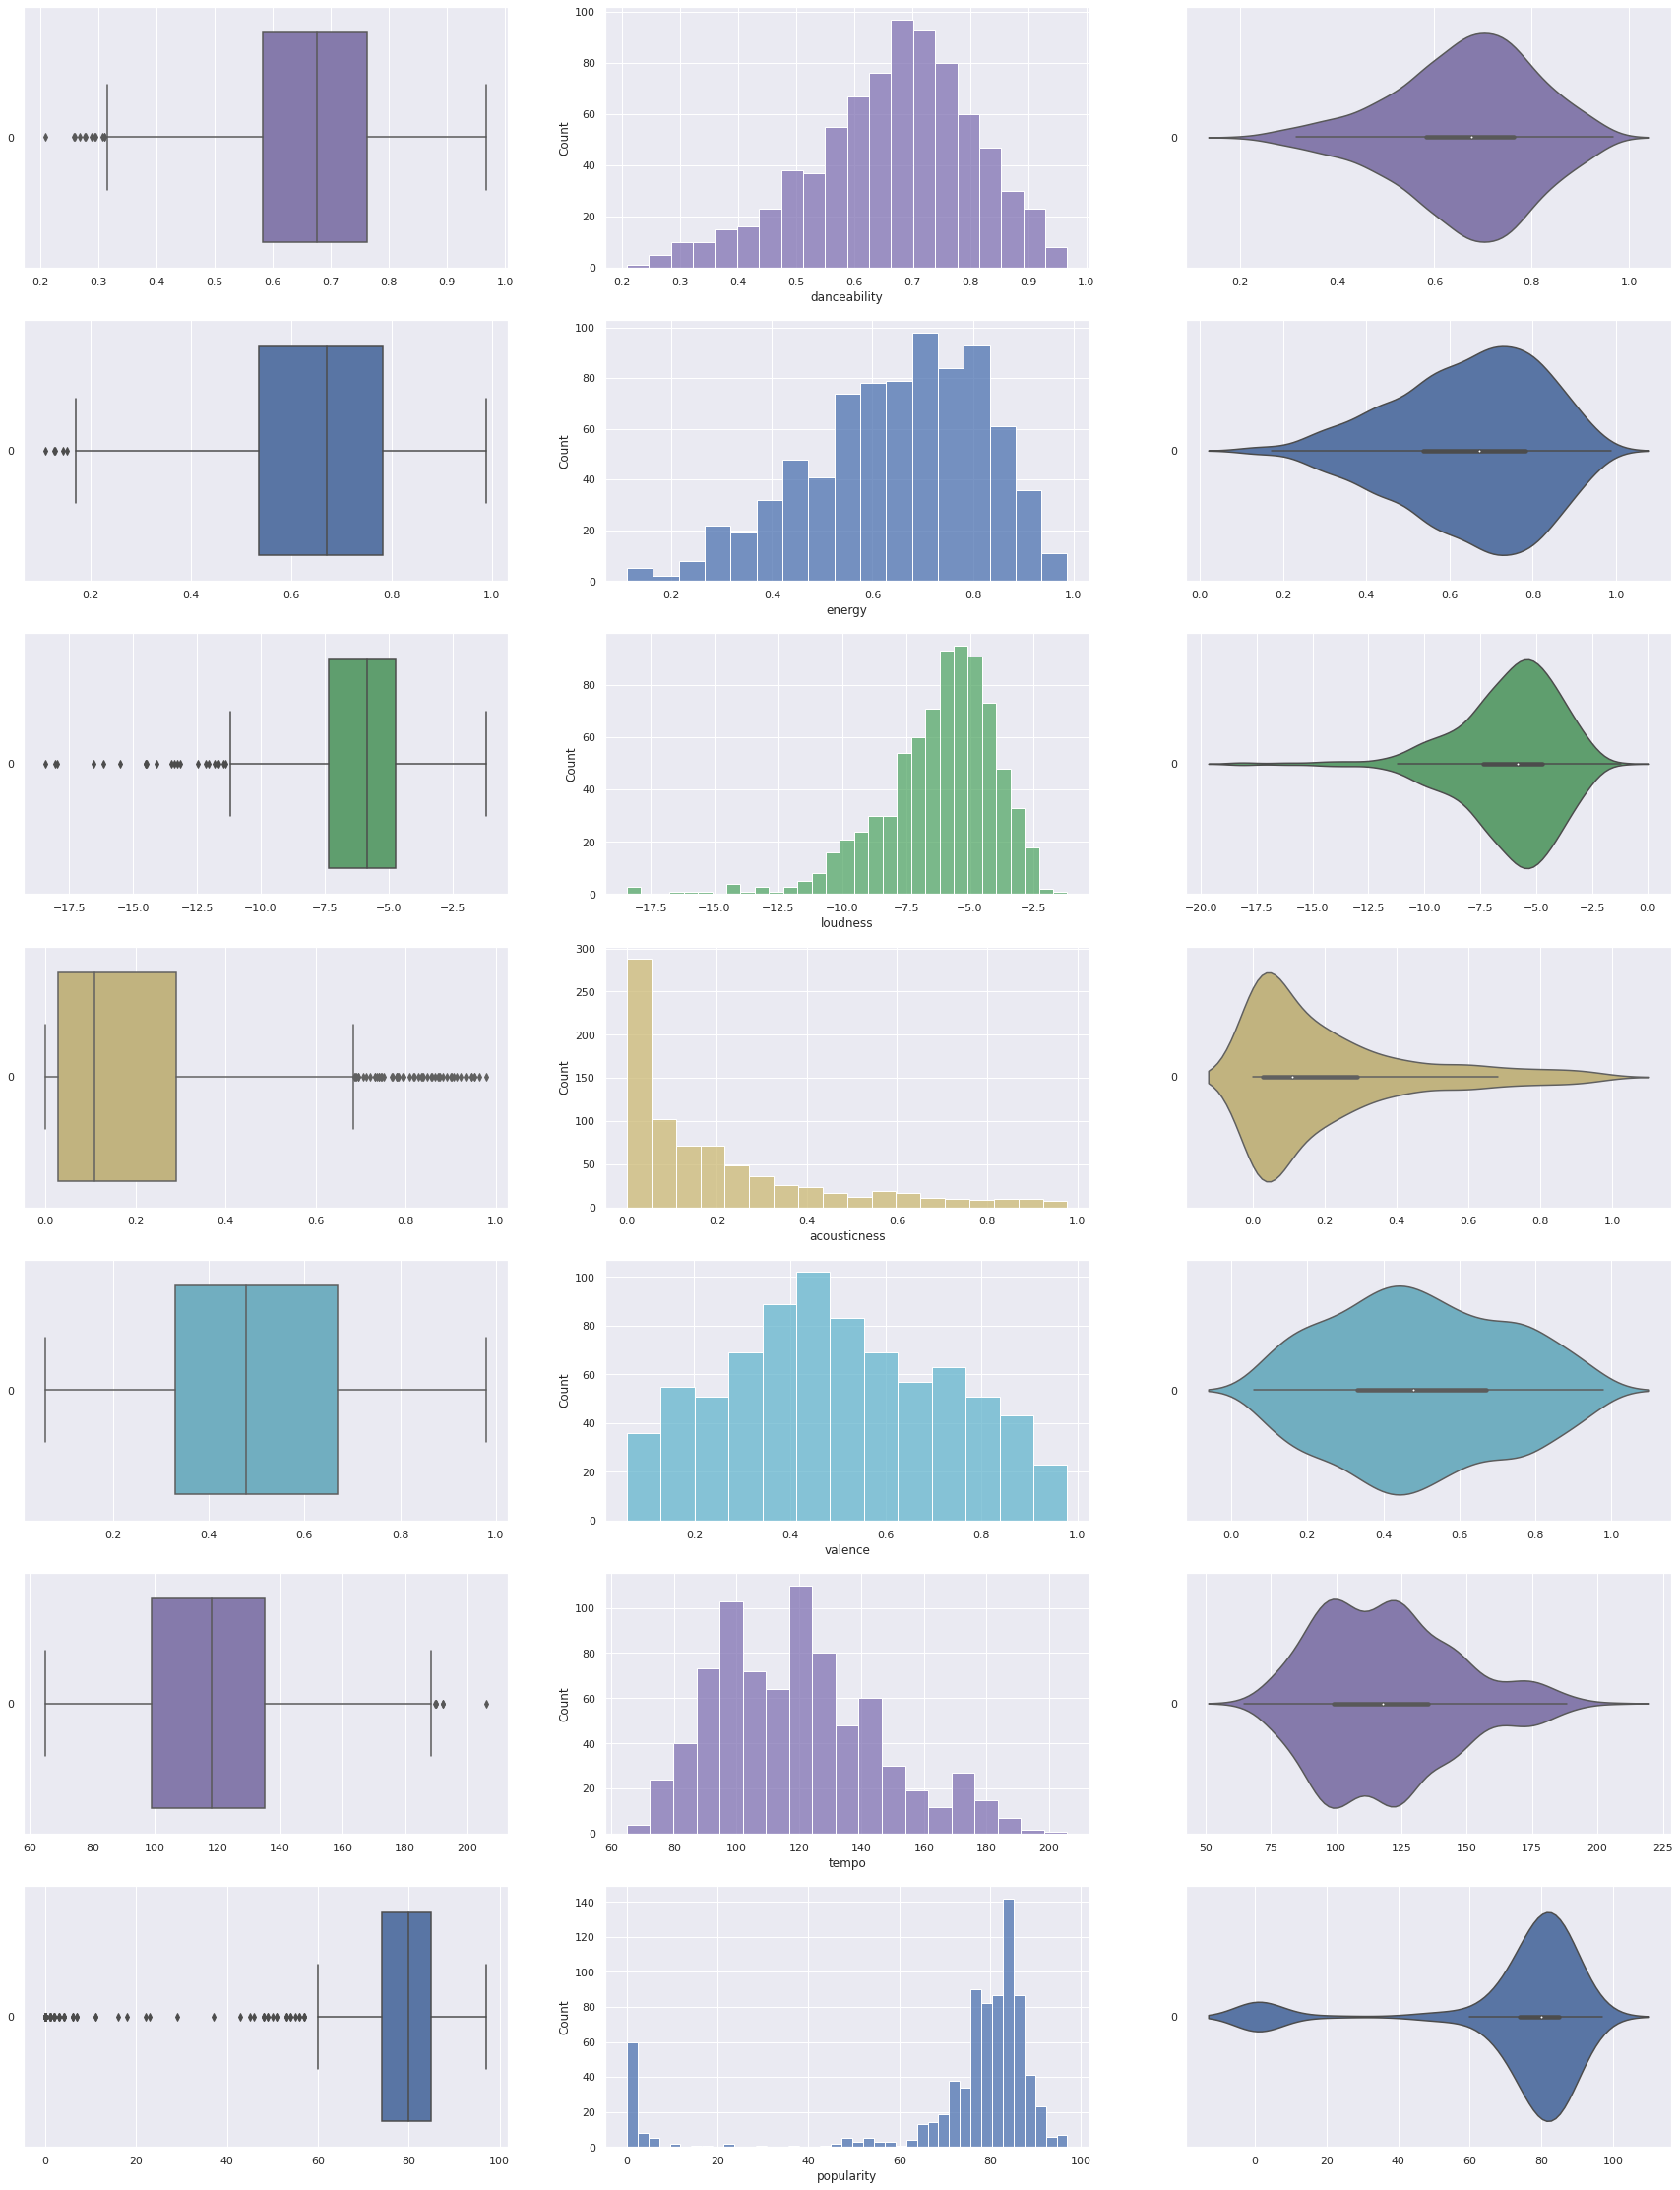

In [ ]:
f, axes = plt.subplots(7, 3, figsize=(30, 40))
colours = ['m', 'b', 'g', 'y','c','m','b','r']

count = 0
for var in songNumData:
    sb.boxplot(data = songNumData[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = songNumData[var], ax = axes[count,1], color=colours[count])
    sb.violinplot(data = songNumData[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

We see that there is an abnormally large amount of data in the "Popularity" as 0, which it should not be the case since we extracted the music data from "Spotify's Most Played All-Time" playlist. This means that all the songs should be quite popular, instead of having a 0 popularity. Thus, we decided to remove the outliers so that the data would be more accurate.

### Remove Outliers: Popularity

 The distribution of values in the sample of popularity seems Gaussian-like, so we used the standard deviation of the sample as a cut-off for identifying outliers.

In [ ]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


In [ ]:
#Calculate Mean and IQR
mean_popularity = songNumData['popularity'].mean()
Q1 = songNumData['popularity'].quantile(0.25)
Q3 = songNumData['popularity'].quantile(0.75)
IQR = Q3 - Q1
print("Mean: ", mean_popularity)
print("IQR: ", IQR)

#Calculate outliers (if data<(Q1-1.5*IQR) or data>(Q3+1.5*IQR))
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print("Upper bound: ", upper)
print("Lower bound:", lower)

Mean:  72.09102402022756
IQR:  11.0
Upper bound:  101.5
Lower bound: 57.5


#### Remove outliers according to the upper and lower bound

In [ ]:
# Rule to identify outliers
rule = ((songNumData['popularity'] < lower) | (songNumData['popularity']  >  upper))

# Count the number of outliers
print("Number of outliers in popularity:")
rule.sum()

Number of outliers in popularity:


103

In [ ]:
# Indices or rows corresponding to outleirs
outlierindices = rule.index[rule == True]
outlierindices

Int64Index([  5,   6,   9,  15,  27,  39,  43,  45,  48,  51,
            ...
            475, 482, 544, 551, 567, 602, 609, 610, 678, 775],
           dtype='int64', length=103)

In [ ]:
# Remove the outliers based on the row indices obtained above
songdf.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
songdf

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,4EWCNWgDS8707fNSZ1oaA5,Heartless,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,0.790,0.647,Words,87.999,-5.983,Vocal,0.654,No,0.05150,87
787,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,0.851,0.551,Words,131.922,-5.177,Vocal,0.807,No,0.15100,76
788,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,98,['pop'],Lover,0.359,0.543,Words,68.534,-7.582,Vocal,0.453,No,0.49200,87
789,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,0.471,0.924,Words,154.961,-3.906,Vocal,0.725,No,0.00301,85


In [ ]:
# Reindex the column since some rows are missing
songdf = songdf.reset_index(drop=True)
songdf

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,4EWCNWgDS8707fNSZ1oaA5,Heartless,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,0.790,0.647,Words,87.999,-5.983,Vocal,0.654,No,0.05150,87
684,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,0.851,0.551,Words,131.922,-5.177,Vocal,0.807,No,0.15100,76
685,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,98,['pop'],Lover,0.359,0.543,Words,68.534,-7.582,Vocal,0.453,No,0.49200,87
686,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,0.471,0.924,Words,154.961,-3.906,Vocal,0.725,No,0.00301,85


### Visualise plot after removing outliers


#### Boxplot, Histogram and Violin Plot

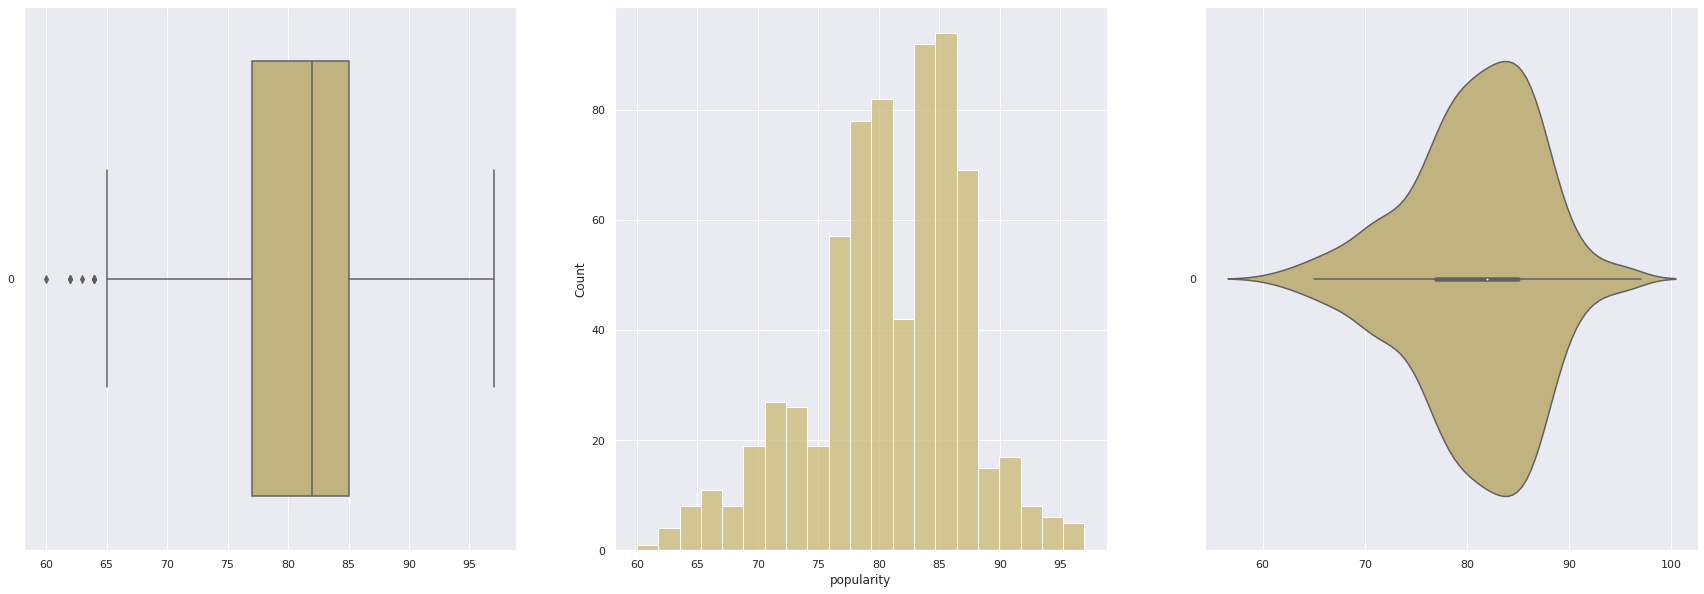

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist_popularity','popularity']])
sb.boxplot(data = songdf['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songdf['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songdf['popularity'], orient = "h", ax = axes[2], color='y')

#### calculating the correlation of the numberical data with popularity

In [ ]:
songNumData.corr()

,danceability,energy,loudness,acousticness,valence,tempo,artist_popularity,popularity
danceability,1.000000,0.032801,0.124542,-0.141234,0.384417,-0.156909,0.076039,-0.009984
energy,0.032801,1.000000,0.721351,-0.620184,0.431632,0.064925,-0.045980,-0.065380
loudness,0.124542,0.721351,1.000000,-0.456077,0.305758,0.039621,0.054334,-0.053326
acousticness,-0.141234,-0.620184,-0.456077,1.000000,-0.246715,-0.079165,0.032895,0.077246
valence,0.384417,0.431632,0.305758,-0.246715,1.000000,-0.004835,-0.094777,-0.017594
tempo,-0.156909,0.064925,0.039621,-0.079165,-0.004835,1.000000,0.030232,0.068907
artist_popularity,0.076039,-0.045980,0.054334,0.032895,-0.094777,0.030232,1.000000,0.302006
popularity,-0.009984,-0.065380,-0.053326,0.077246,-0.017594,0.068907,0.302006,1.000000


#### heatmap of the correlation matrix between numerical data

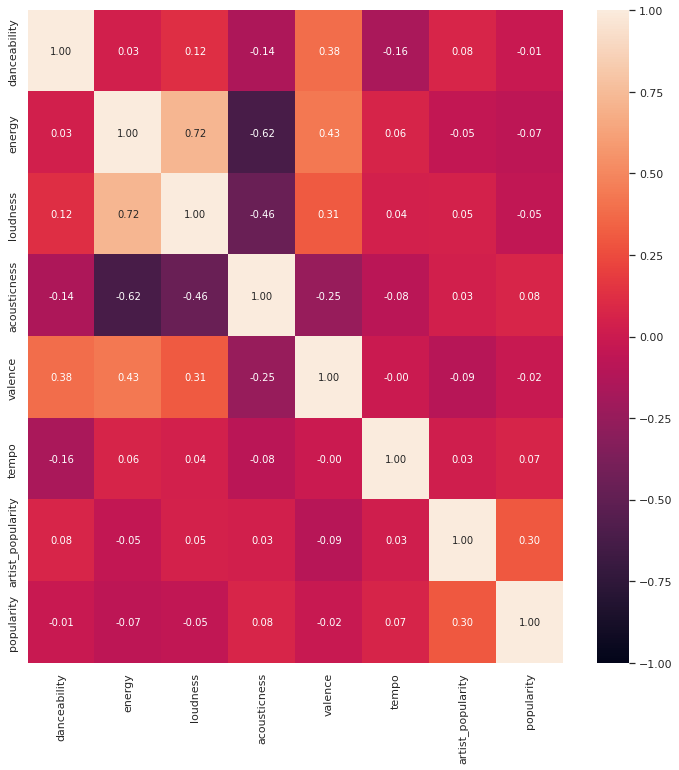

In [ ]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(songNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### pairplot of the numerical data against one another

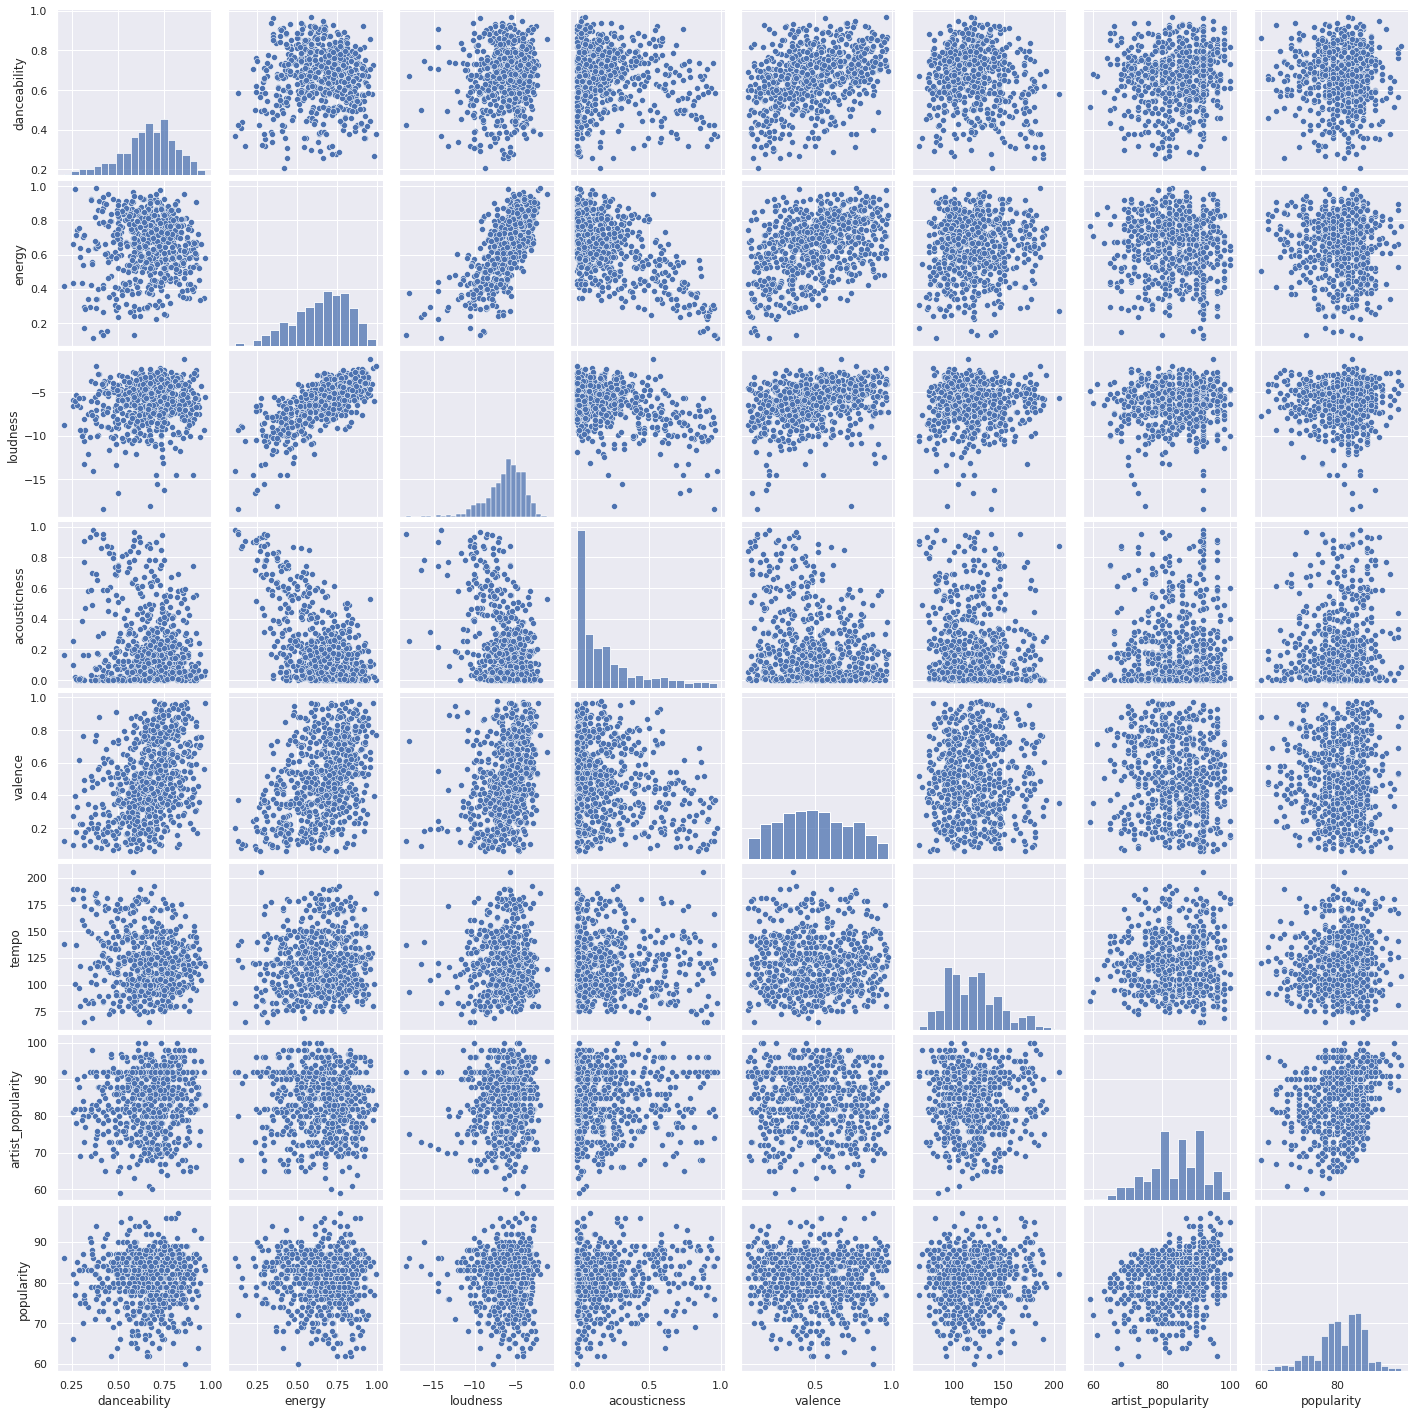

In [ ]:
sb.pairplot(data = songNumData)

Among the different variables, artist popularity has the highest correlation to track popularity. We can see that the other variables are not really correlated with popularity as the correlation is quite low.

## **Categorical Data Analysis**

### Create new data frame to process categorical data
This data frame uses the dataframe with the outliers removed

In [ ]:
songCatData = pd.DataFrame(songdf[['live_performance','speechiness', 'instrumental']])
songCatData = songCatData.astype('category')
songCatData.describe()

,live_performance,speechiness,instrumental
count,688,688,688
unique,1,2,2
top,No,Words,Vocal
freq,688,663,685


### Visualise counts across the levels of the four different categorical variables




Words    663
Mix       25
Music      0
Name: speechiness, dtype: int64

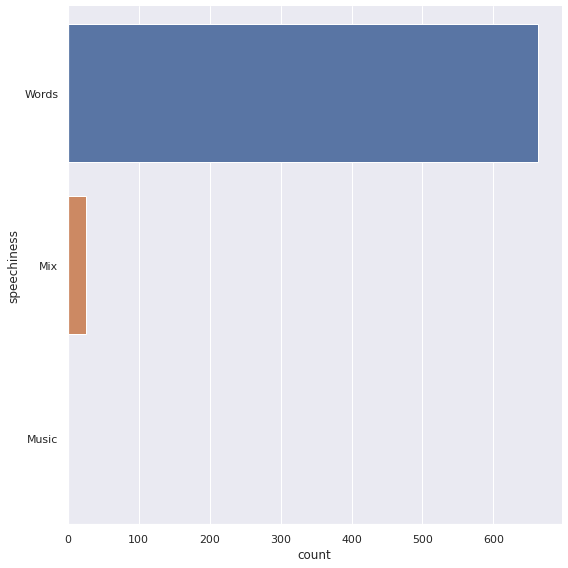

In [ ]:
sb.catplot(y = 'speechiness', data = songCatData, kind = "count", height = 8)
songCatData["speechiness"].value_counts()

Most of the popular tracks are of speech type words.

Vocal        685
No Vocals      3
Name: instrumental, dtype: int64

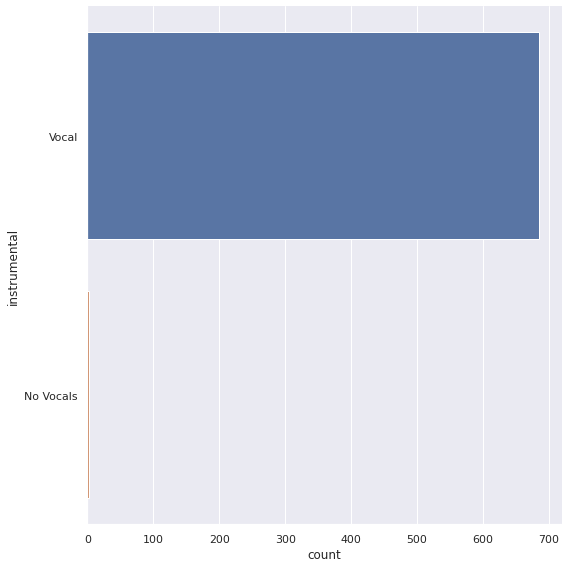

In [ ]:
sb.catplot(y = 'instrumental', data = songCatData, kind = "count", height = 8)
songCatData["instrumental"].value_counts()

Almost all of popular tracks are of vocal type.

No     688
Yes      0
Name: live_performance, dtype: int64

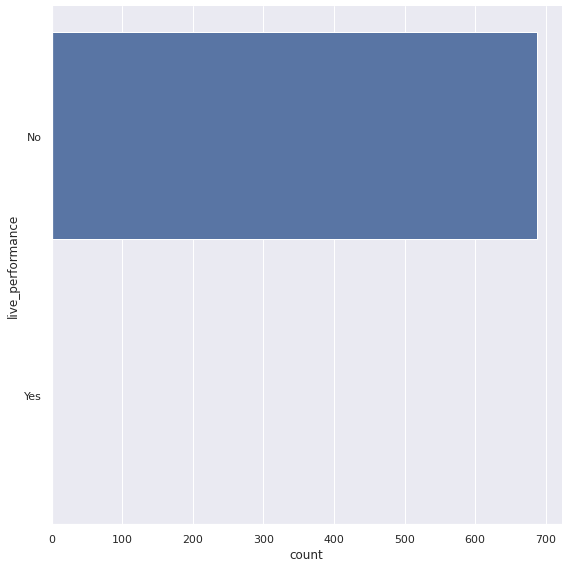

In [ ]:
sb.catplot(y = 'live_performance', data = songCatData, kind = "count", height = 8)
songCatData["live_performance"].value_counts()

All of the popular tracks are not live performance

### Visualise distribution of popularity with respect to the different categories

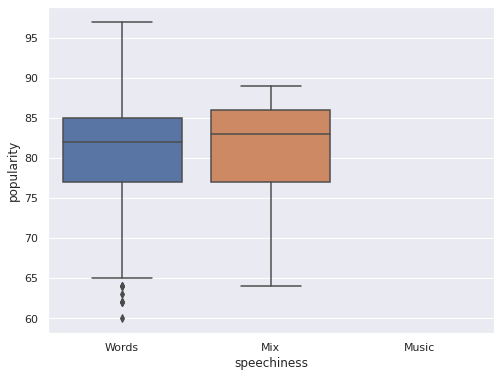

In [ ]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "speechiness")

The median popularity of tracks with speech type of music is about the same as Mix speech type. While songs with only music often are not popular. However, in general, popularity does not vary significantly acrodd the different categories.

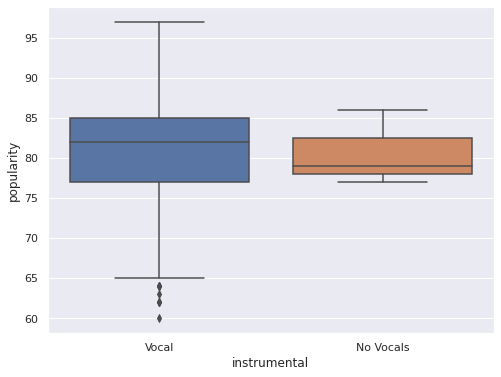

In [ ]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "instrumental")

The median popularity of Vocal tracks is higher than that of Non-vocal tracks. It can be seen that vocal tracks are generally more popular than non-vocal tracks

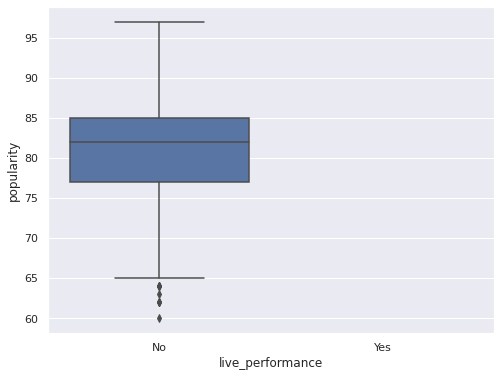

In [ ]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "live_performance")

We can see that all the popular songs are not live performance.

# **Visualise plot after removing outliers**



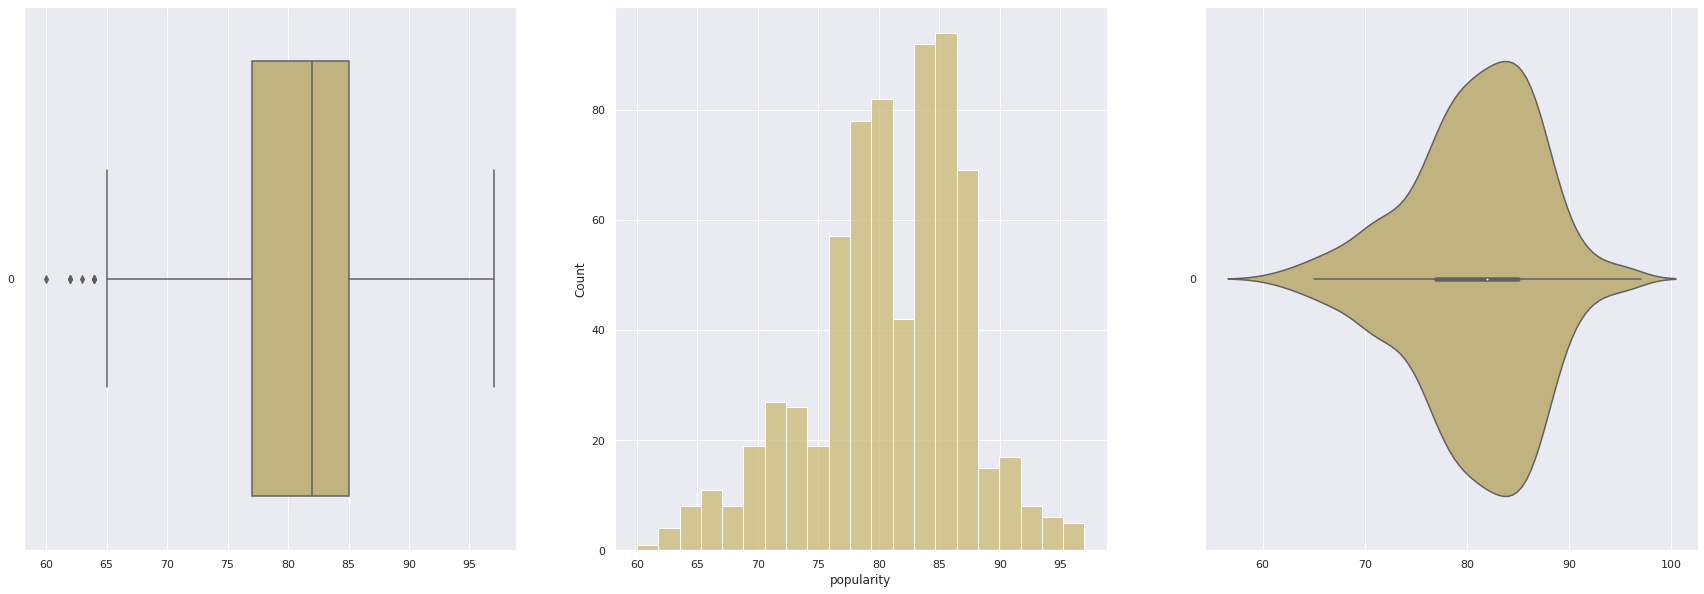

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist_popularity','popularity']])
sb.boxplot(data = songdf['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songdf['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songdf['popularity'], orient = "h", ax = axes[2], color='y')


# **Model 1: Regression**

## **Uni-variate Linear Regression**

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
Pops = pd.DataFrame(songdf['popularity'])   #response
Attributes = ["danceability", "energy", "loudness", "acousticness", "valence", "tempo", "artist_popularity"]

In [ ]:
Pops.head()


,popularity
0,89
1,95
2,68
3,88
4,90


In [ ]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "pink")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

#############################################################
danceability
#############################################################
Intercept 	: b =  [81.0910046]
Coefficients 	: a =  [[0.10662623]]


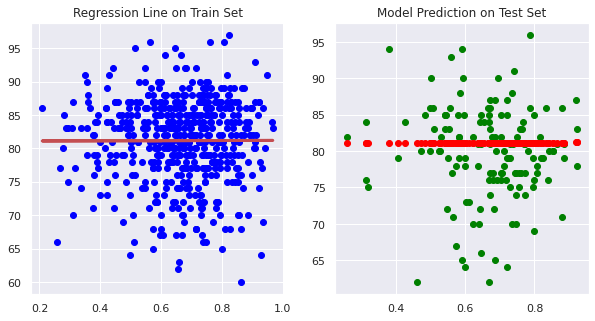

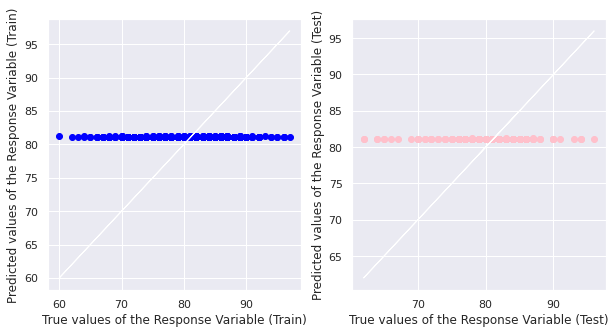

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 6.220244785359874e-06
Mean Squared Error (MSE) 	: 38.66266529238587

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 43.69233637128491

#############################################################
energy
#############################################################
Intercept 	: b =  [82.67040814]
Coefficients 	: a =  [[-2.91698172]]


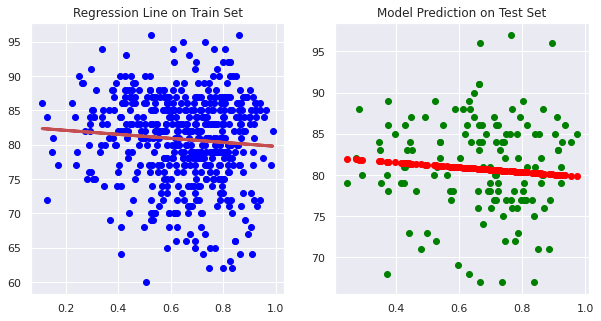

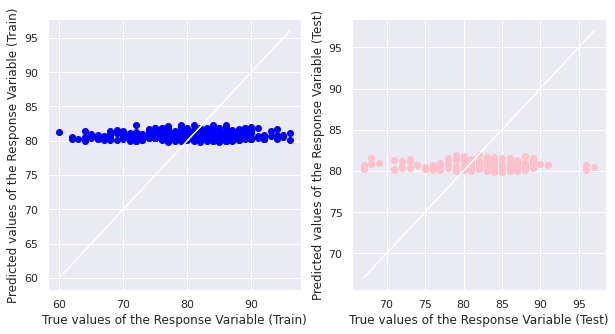

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.006244038685469744
Mean Squared Error (MSE) 	: 40.78136620832851

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 34.06652700511173

#############################################################
loudness
#############################################################
Intercept 	: b =  [79.920243]
Coefficients 	: a =  [[-0.13114995]]


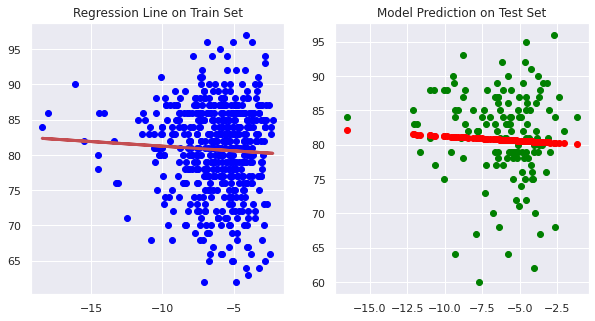

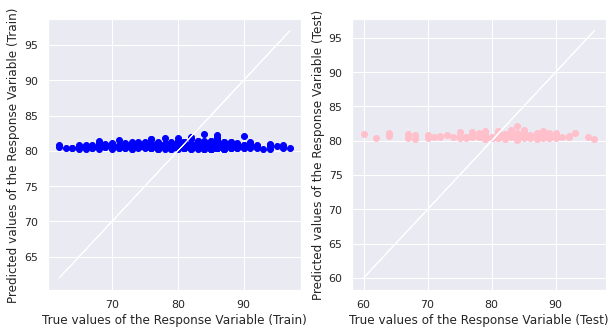

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0024115240422138973
Mean Squared Error (MSE) 	: 38.83756710900668

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 42.10143489512053

#############################################################
acousticness
#############################################################
Intercept 	: b =  [80.49146819]
Coefficients 	: a =  [[2.96900611]]


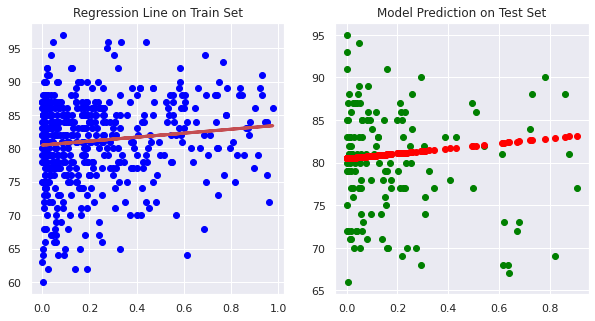

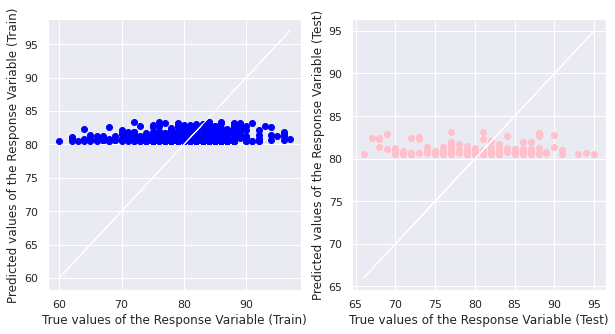

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.012941483924031827
Mean Squared Error (MSE) 	: 38.8440612929953

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 41.87266842918658

#############################################################
valence
#############################################################
Intercept 	: b =  [80.94424424]
Coefficients 	: a =  [[-0.4677652]]


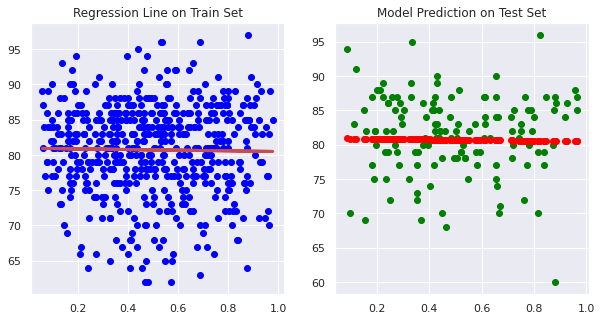

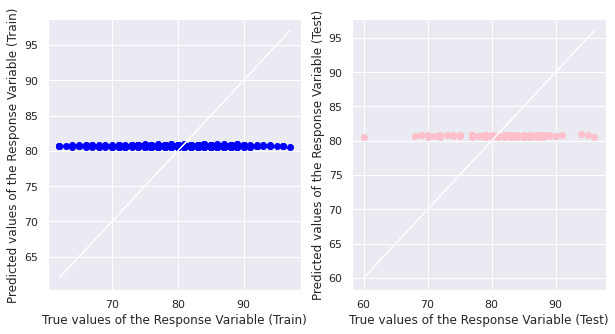

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.00028548728481281316
Mean Squared Error (MSE) 	: 41.219200982608285

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 33.14182906038997

#############################################################
tempo
#############################################################
Intercept 	: b =  [79.83388461]
Coefficients 	: a =  [[0.00822498]]


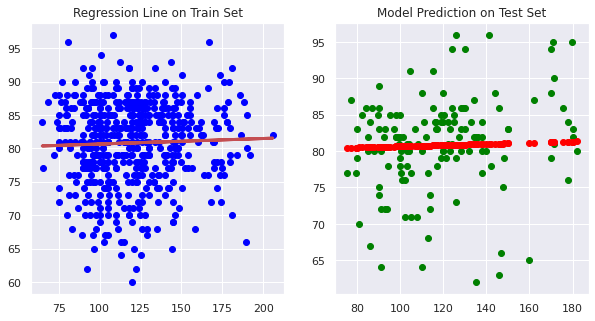

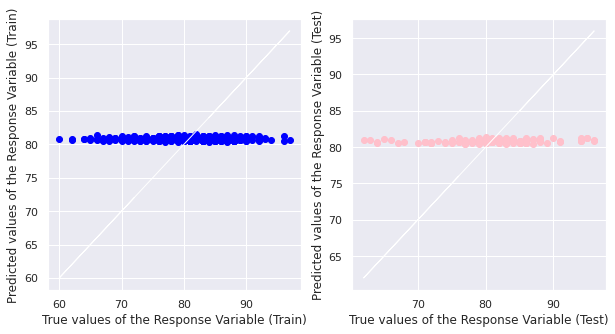

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0012215233241761325
Mean Squared Error (MSE) 	: 38.75227472031894

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 42.21664115466

#############################################################
artist_popularity
#############################################################
Intercept 	: b =  [61.17123835]
Coefficients 	: a =  [[0.23478808]]


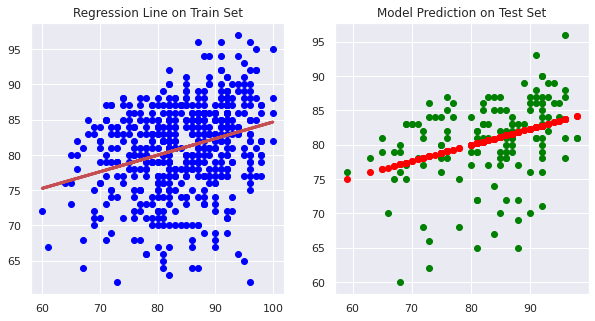

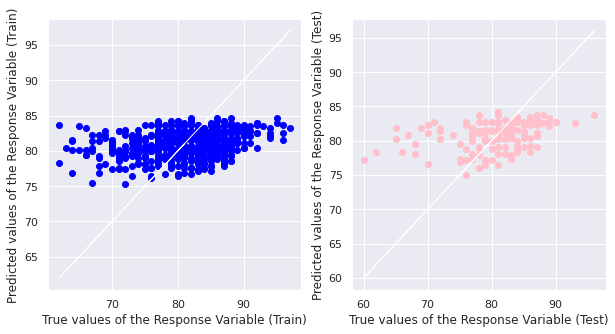

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0846898274745167
Mean Squared Error (MSE) 	: 36.79820427567637

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32.69967346903638



In [ ]:
for item in Attributes:
  print("#############################################################")
  print(item)
  print("#############################################################")
  univariateLinearRegression(item, 'popularity', songdf)

We can see that for each variable, when we are running linear regression on them, their R^2 value is very close to 0 which means that ... The MSE for train data and test data are rather high as well, this means that perhaps it is not accurate to use any single variable to predict the popularity

## **Multi Variate Linear Regression**

In [ ]:
y = pd.DataFrame(songdf['popularity']) #Response
X = pd.DataFrame(songdf[Attributes])   #Predictor, using all the variables


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

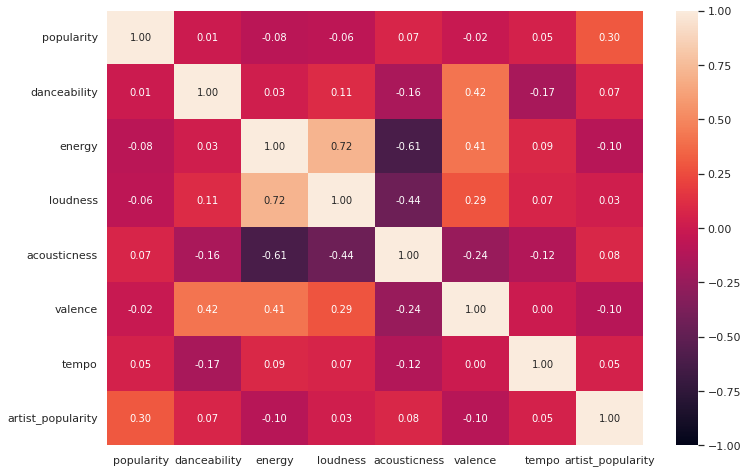

In [ ]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

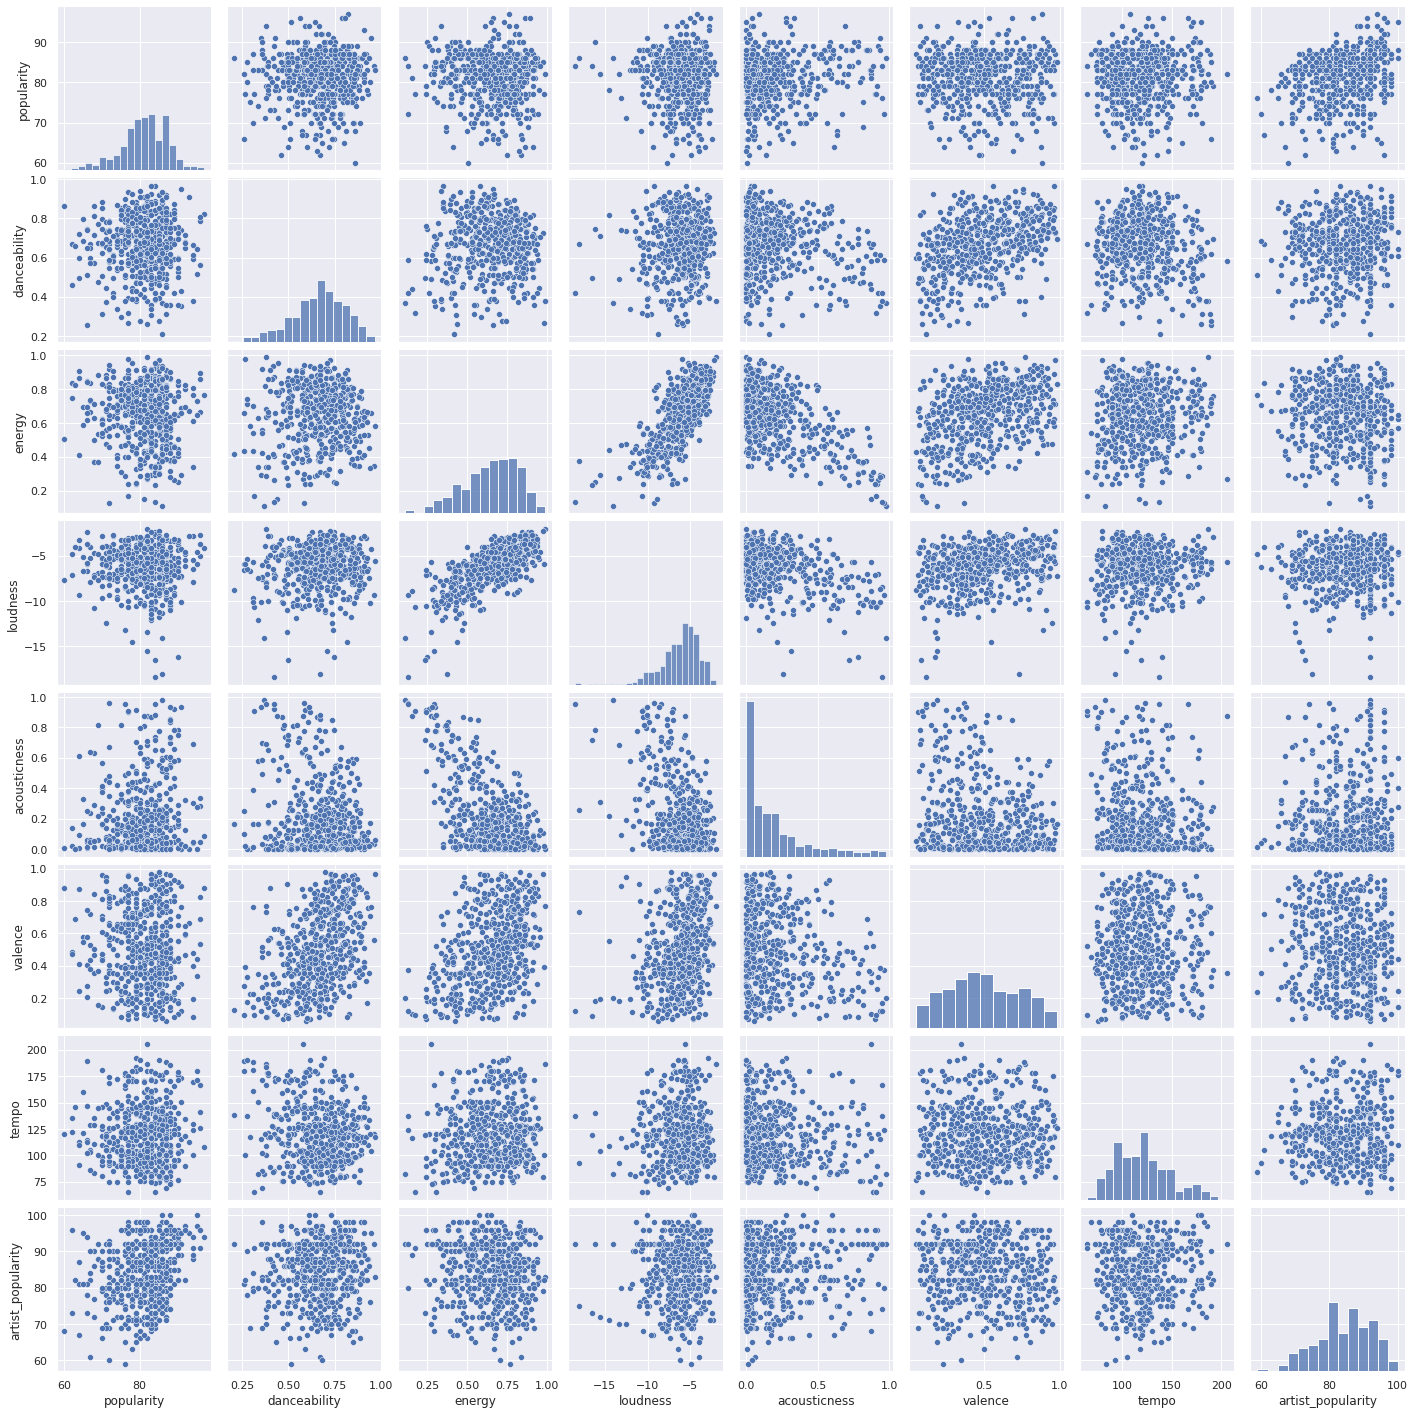

In [ ]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

Intercept of Regression 	: b =  [59.4462819]
Coefficients of Regression 	: a =  [[-0.74490709 -0.65133923 -0.17543462  0.59852355  1.3311925   0.00964241
   0.23139381]]

          Predictors  Coefficients
0       danceability     -0.744907
1             energy     -0.651339
2           loudness     -0.175435
3       acousticness      0.598524
4            valence      1.331193
5              tempo      0.009642
6  artist_popularity      0.231394



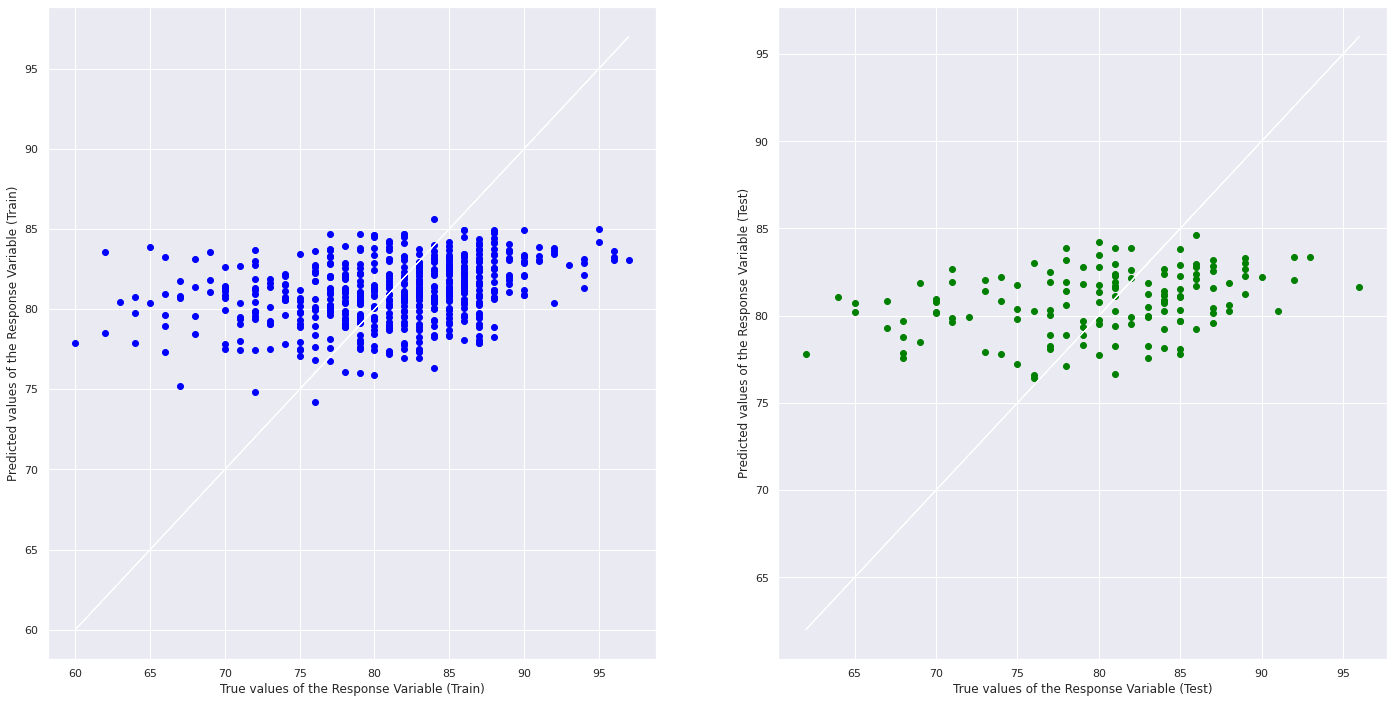

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09967608262456895
Mean Squared Error (MSE) 	: 34.33655058458678

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.097648106573474
Mean Squared Error (MSE) 	: 40.27984376191397



In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = pd.DataFrame(songdf['popularity']) #Response
X = pd.DataFrame(songdf[Attributes])   #Predictor, using all the variables


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

We can see that even though we use `all variables` to try to predict the 'Popularity', the R^2 value indeed increased by a little but it is still very close to 0. This suggests that linear regression might not be the best model to predict the popularity, especially given that the correlation between the attributes and the popularity are not really strong.

## **Decision Tree Regression**

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songdf['popularity'])
X = pd.DataFrame(songdf[Attributes])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

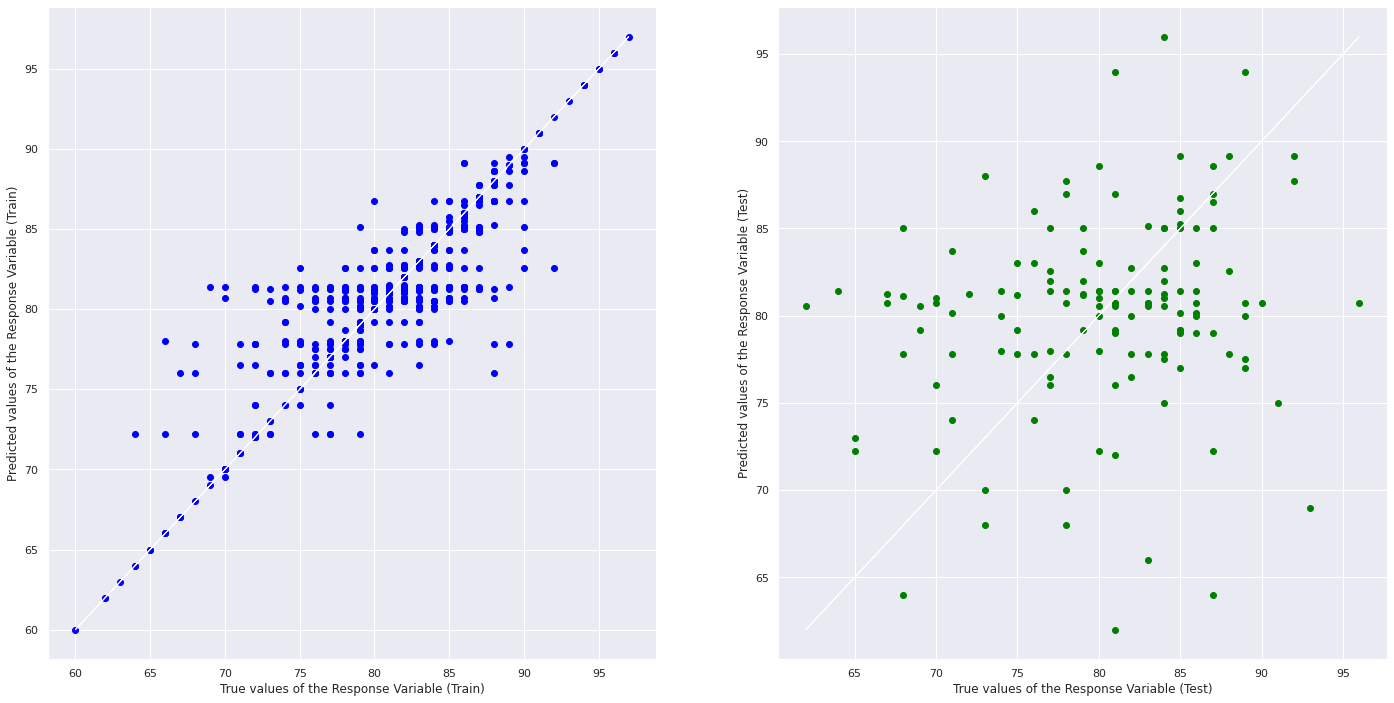

In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.23019329088278428
Mean Squared Error (MSE) on Train Set 	: 29.358885727496812
Explained Variance (R^2) on Test Set 	: 0.04897169536108714
Mean Squared Error (MSE) on Test Set 	: 42.45269700554189


## **Random Forest Regression**

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songdf['popularity'])
X = pd.DataFrame(songdf[Attributes])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor(n_estimators=500, max_depth=10)
regress.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(max_depth=10, n_estimators=500)

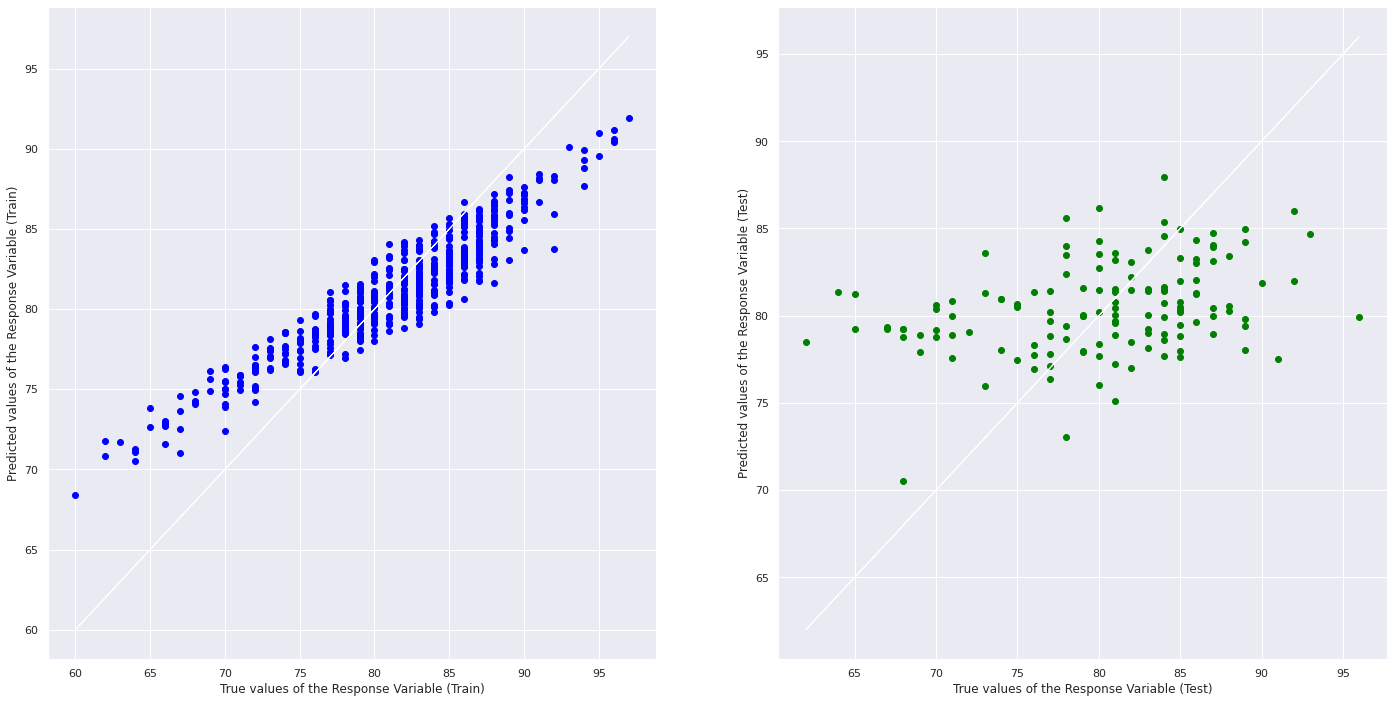

In [ ]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.7626272303243928
Mean Squared Error (MSE) on Train Set 	: 9.052921905184936
Explained Variance (R^2) on Test Set 	: 0.11104050204043658
Mean Squared Error (MSE) on Test Set 	: 39.6820242184113


*   Random Forest Regression Model has the best Explained Variance (R^2)
*   and the minimum MSE on both the Train and Test Setsout of the models.

Therefore `Random Forest Regression` should be used to predict the popularity score in this Regression Model.

## **Tune the hyper-parameter of the Random Forest Regressor**  
We can make use of the `GridSearchCV` to tune the hyper-parameter to find the optimal `n_estimators` and `max_depth` for the best result.

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestRegressor(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5)                    # 5-fold cross-validation


# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.popularity.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestRegressor(max_depth=2, n_estimators=300)
0.06429002691602101


In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songdf['popularity'])
X = pd.DataFrame(songdf[Attributes])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor(n_estimators=300, max_depth=20)
regress.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(max_depth=20, n_estimators=300)

## **Using the optimal hyper-parameter to run the regression model again**  
We change the number of trees, `n_estimators = 300`, the depth of each tree, `max_depth = 20`

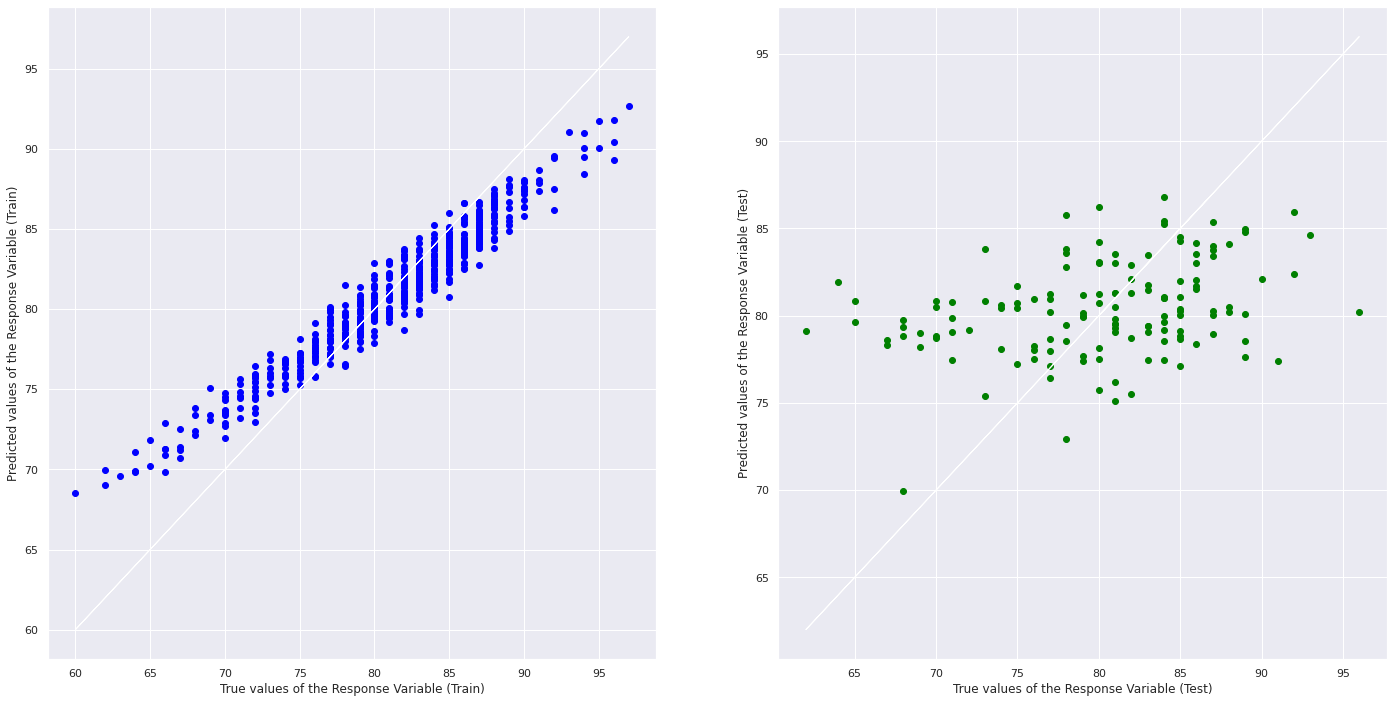

In [ ]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8605027735078499
Mean Squared Error (MSE) on Train Set 	: 5.3201447628097664
Explained Variance (R^2) on Test Set 	: 0.09726320663912691
Mean Squared Error (MSE) on Test Set 	: 40.29702520668338


We can see that the R^2 for train data has indeed increase but not for the test data.  

Given the results from the numerous regression model, we think that regression is not the best model to predict the popularity of the songs using the attributes, given generally low R^2 and high MSE for the test data.  

One of the main problem we identified will be that the attributes are not really strongly correlated to popularity and thus, there is very low linear relationship between them, making it harder for the regression to predict the popularity.